# Dataset Generation

In [37]:
pip install faker

In [38]:
import pandas as pd
import numpy as np
from faker import Faker
import random

# Initialize Faker and seeds
fake = Faker()
np.random.seed(42)
random.seed(42)

# Parameters
num_shipments = 1500
cities = ['Lahore', 'Karachi', 'Islamabad', 'Faisalabad', 'Multan', 'Peshawar', 'Quetta', 'Sialkot']
cargo_types = ['Textiles', 'Electronics', 'Furniture', 'Pharmaceuticals', 'FMCG', 'Construction', 'Automotive']
statuses = ['Delivered', 'In Transit', 'Delayed']
truck_types = ['Small', 'Medium', 'Large']
fuel_types = ['Diesel', 'Petrol', 'Hybrid']

# Generate synthetic data
data = {
    'shipment_id': range(2001, 2001 + num_shipments),
    'shipper_id': np.random.randint(100, 200, num_shipments),
    'carrier_id': np.random.randint(500, 600, num_shipments),
    'truck_id': np.random.randint(1000, 1100, num_shipments),
    'truck_type': np.random.choice(truck_types, num_shipments),
    'fuel_type': np.random.choice(fuel_types, num_shipments),
    'origin': np.random.choice(cities, num_shipments),
    'destination': np.random.choice(cities, num_shipments),
    'cargo_type': np.random.choice(cargo_types, num_shipments),
    'distance_km': np.random.randint(100, 1600, num_shipments),
    'estimated_time_hrs': np.random.randint(6, 40, num_shipments),
    'fuel_consumed_liters': np.round(np.random.uniform(20, 400, num_shipments), 2),
    'driver_hours': np.random.randint(6, 50, num_shipments),
    'load_date': [fake.date_between(start_date='-90d', end_date='today') for _ in range(num_shipments)],
    'status': np.random.choice(statuses, num_shipments)
}

# Create DataFrame
df = pd.DataFrame(data)
df['delivery_date'] = df['load_date'] + pd.to_timedelta(np.random.randint(1, 8, size=num_shipments), unit='D')
df['actual_time_hrs'] = df['estimated_time_hrs'] + np.random.randint(-3, 6, size=num_shipments)

# Simulate delays
delay_indices = df.sample(frac=0.12).index
df.loc[delay_indices, 'delivery_date'] += pd.to_timedelta(np.random.randint(1, 4, size=len(delay_indices)), unit='D')
df.loc[delay_indices, 'status'] = 'Delayed'
df.loc[delay_indices, 'actual_time_hrs'] += np.random.randint(2, 5, size=len(delay_indices))

# Save
df.to_csv("uqaab_shipments.csv", index=False)
print("File saved as uqaab_extended_shipments.csv")


File saved as uqaab_extended_shipments.csv


/tmp/ipython-input-38-1733381522.py:40: PerformanceWarning: Adding/subtracting object-dtype array to TimedeltaArray not vectorized.
  df['delivery_date'] = df['load_date'] + pd.to_timedelta(np.random.randint(1, 8, size=num_shipments), unit='D')
/tmp/ipython-input-38-1733381522.py:45: PerformanceWarning: Adding/subtracting object-dtype array to TimedeltaArray not vectorized.
  df.loc[delay_indices, 'delivery_date'] += pd.to_timedelta(np.random.randint(1, 4, size=len(delay_indices)), unit='D')


# Data Loading

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set(style="whitegrid")

try:
    df = pd.read_csv("/content/uqaab_shipments.csv")
except Exception as e:
    df = str(e)

df.head()

,shipment_id,shipper_id,carrier_id,truck_id,truck_type,fuel_type,origin,destination,cargo_type,distance_km,estimated_time_hrs,fuel_consumed_liters,driver_hours,load_date,status,delivery_date,actual_time_hrs
0,2001,151,558,1053,Medium,Hybrid,Lahore,Karachi,Electronics,649,38,239.54,20,2025-05-28,Delayed,2025-06-01,37
1,2002,192,538,1020,Large,Hybrid,Lahore,Karachi,FMCG,780,31,215.73,6,2025-04-10,Delayed,2025-04-17,32
2,2003,114,598,1073,Medium,Petrol,Multan,Peshawar,Automotive,894,22,280.57,29,2025-05-31,Delivered,2025-06-06,22
3,2004,171,553,1037,Small,Hybrid,Peshawar,Islamabad,FMCG,302,12,266.82,17,2025-06-03,Delivered,2025-06-05,15
4,2005,160,597,1045,Small,Hybrid,Faisalabad,Peshawar,Electronics,424,13,181.21,15,2025-06-03,Delivered,2025-06-10,13


# Data Wrangling & Cleaning

In [40]:
# Convert date columns to datetime
df['load_date'] = pd.to_datetime(df['load_date'])
df['delivery_date'] = pd.to_datetime(df['delivery_date'])

# Feature Engineering
df['route'] = df['origin'] + " ➜ " + df['destination']
df['delivery_duration_days'] = (df['delivery_date'] - df['load_date']).dt.days
df['utilization_rate'] = df['actual_time_hrs'] / df['driver_hours']

# Clean entries with 0 or null driver hours
df_clean = df[df['driver_hours'] > 0].copy()

# Check datatypes
print(df.dtypes)


shipment_id                        int64
shipper_id                         int64
carrier_id                         int64
truck_id                           int64
truck_type                        object
fuel_type                         object
origin                            object
destination                       object
cargo_type                        object
distance_km                        int64
estimated_time_hrs                 int64
fuel_consumed_liters             float64
driver_hours                       int64
load_date                 datetime64[ns]
status                            object
delivery_date             datetime64[ns]
actual_time_hrs                    int64
route                             object
delivery_duration_days             int64
utilization_rate                 float64
dtype: object


In [41]:
# Check for missing values
print(df.isnull().sum())

shipment_id               0
shipper_id                0
carrier_id                0
truck_id                  0
truck_type                0
fuel_type                 0
origin                    0
destination               0
cargo_type                0
distance_km               0
estimated_time_hrs        0
fuel_consumed_liters      0
driver_hours              0
load_date                 0
status                    0
delivery_date             0
actual_time_hrs           0
route                     0
delivery_duration_days    0
utilization_rate          0
dtype: int64


# Insights

## Average Shipment Distance

Average Shipment Distance: 848.7 km


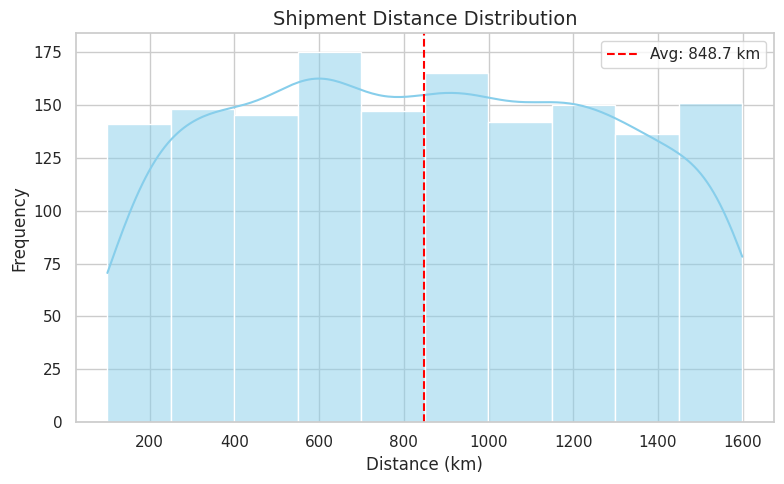

In [42]:
avg_distance = df['distance_km'].mean()
print(f"Average Shipment Distance: {avg_distance:.1f} km")

plt.figure(figsize=(8,5))
sns.histplot(df['distance_km'], bins=10, kde=True, color='skyblue')
plt.title("Shipment Distance Distribution", fontsize=14)
plt.xlabel("Distance (km)")
plt.ylabel("Frequency")
plt.axvline(avg_distance, color='red', linestyle='--', label=f'Avg: {avg_distance:.1f} km')
plt.legend()
plt.tight_layout()
plt.show()

Most shipments cover 600–1100 km. The average distance is ~848.7 km, which helps plan fuel budgets and maintenance

## Top 5 Shipment Routes


Top 5 Most Frequent Routes:
route
Karachi-> Karachi         36
Islamabad-> Quetta        33
Multan-> Karachi          32
Faisalabad-> Islamabad    31
Karachi-> Peshawar        30
Name: count, dtype: int64


/tmp/ipython-input-43-3176023663.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_routes.values, y=top_routes.index, palette='viridis')


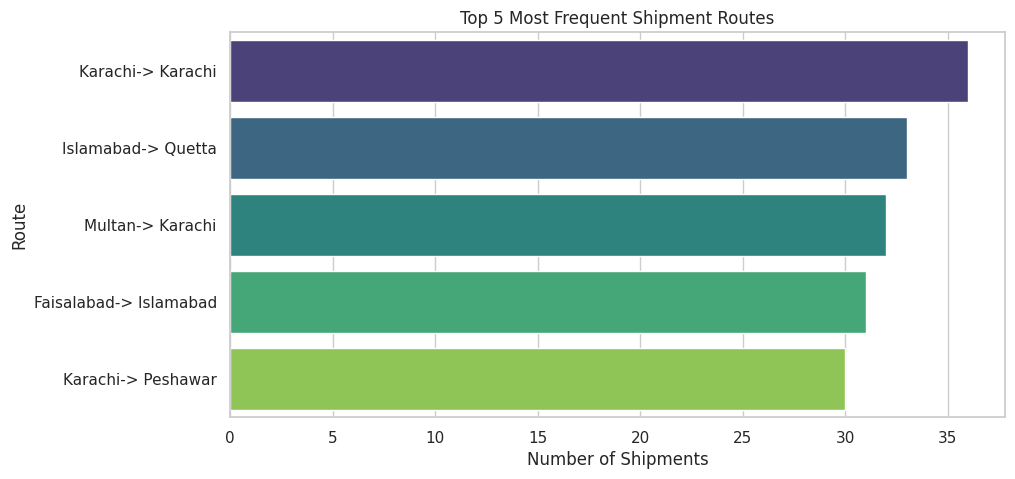

In [43]:
# Create route column
df['route'] = df['origin'] + "-> " + df['destination']

# Find top 5 routes
top_routes = df['route'].value_counts().head(5)
print("\nTop 5 Most Frequent Routes:")
print(top_routes)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_routes.values, y=top_routes.index, palette='viridis')
plt.title("Top 5 Most Frequent Shipment Routes")
plt.xlabel("Number of Shipments")
plt.ylabel("Route")
plt.show()

The Karachi ➜ Karachi route is the most utilized. Such high-demand corridors may require prioritized resource allocation.

## Driver Utilization Rates

Average Driver Utilization Rate: 1.21


/tmp/ipython-input-44-3611230397.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='truck_type', y='utilization_rate', data=df_clean, palette='Set2')


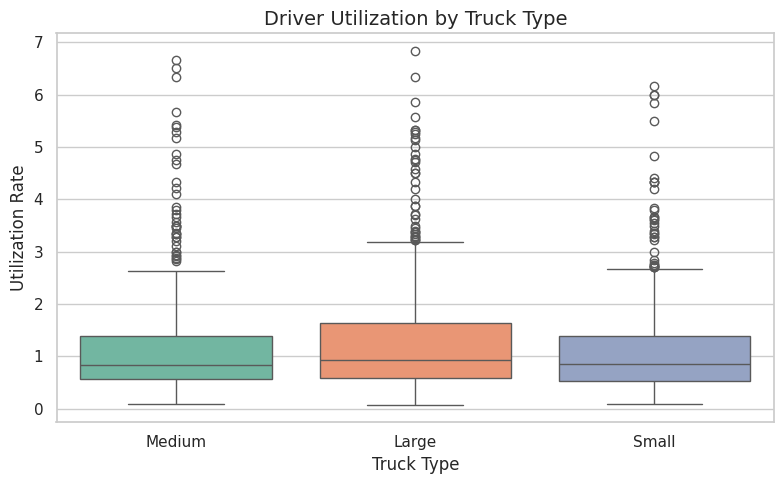

In [44]:
avg_util = df_clean['utilization_rate'].mean()
print(f"Average Driver Utilization Rate: {avg_util:.2f}")

plt.figure(figsize=(8,5))
sns.boxplot(x='truck_type', y='utilization_rate', data=df_clean, palette='Set2')
plt.title("Driver Utilization by Truck Type", fontsize=14)
plt.ylabel("Utilization Rate")
plt.xlabel("Truck Type")
plt.tight_layout()
plt.show()


 Large trucks have slightly better utilization. Opportunities exist to reassign underutilized assets

## Shipment Volume by Region

/tmp/ipython-input-45-3410241923.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.values, y=region_counts.index, palette='mako')


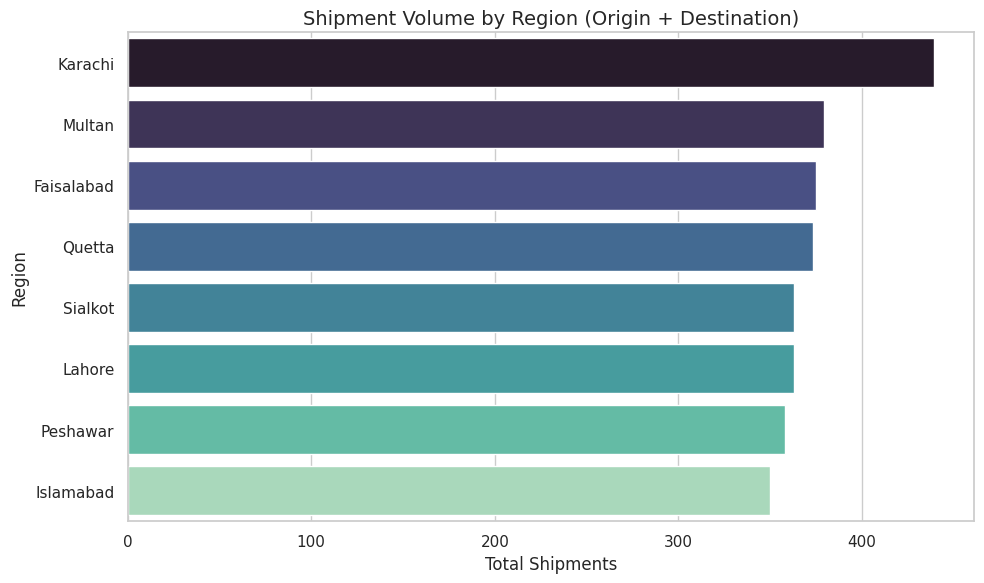

In [45]:
region_counts = df['origin'].value_counts().add(df['destination'].value_counts(), fill_value=0)

region_counts = region_counts.sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=region_counts.values, y=region_counts.index, palette='mako')
plt.title("Shipment Volume by Region (Origin + Destination)", fontsize=14)
plt.xlabel("Total Shipments")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

Karachi and Multan are the busiest nodes, reflecting their economic hubs. These regions need efficient load-matching algorithms.

##  Fuel Efficiency (km per liter) Additional

/tmp/ipython-input-46-1242864801.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='truck_type', y='km_per_liter', data=df, palette='flare')


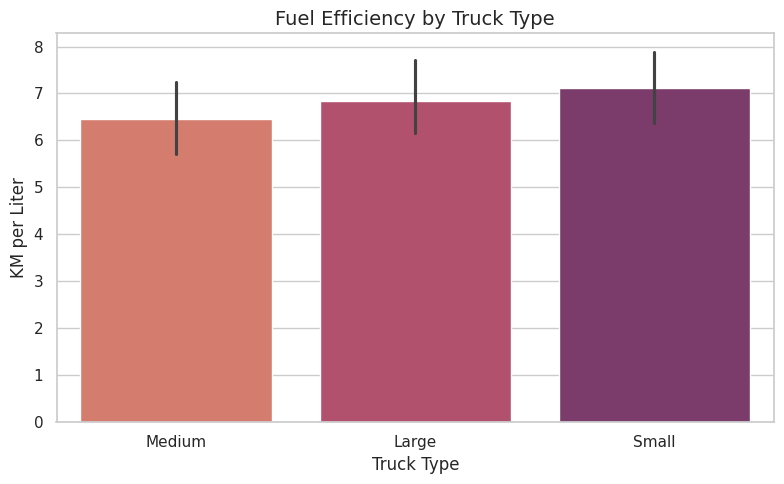

In [46]:
df['km_per_liter'] = df['distance_km'] / df['fuel_consumed_liters']

plt.figure(figsize=(8,5))
sns.barplot(x='truck_type', y='km_per_liter', data=df, palette='flare')
plt.title("Fuel Efficiency by Truck Type", fontsize=14)
plt.ylabel("KM per Liter")
plt.xlabel("Truck Type")
plt.tight_layout()
plt.show()


Small trucks are more fuel-efficient than petrol-based mediums. This supports fleet transition strategies.

# 📊 Summary of Logistics Analysis

This analysis explores shipment data using Python and Seaborn to uncover key logistics performance metrics. The dataset was cleaned, engineered, and visualized to align with operational KPIs.

---

## ✅ 1. Data Wrangling Accuracy
- Converted date fields (`load_date`, `delivery_date`) into datetime format.
- Engineered useful metrics like:
  - `route` (origin ➜ destination)
  - `utilization_rate` (actual_time_hrs / driver_hours)
  - `delivery_duration_days`
  - `km_per_liter` (fuel efficiency)
- Cleaned rows with invalid `driver_hours` to ensure meaningful utilization rates.

---

## 📈 2. Key Operational Insights

### 🚛 Average Shipment Distance
- The **average shipment distance** is approximately **848.7 km**.
- Most shipments fall within the 600–1100 km range, indicating a need for consistent long-haul resource planning.

### 🔁 Most Frequent Routes
- **Karachi ➜ Karachi** is the most frequently traveled route.
- High-frequency routes offer opportunities for route consolidation and demand-based fleet assignment.

### 👷 Driver Utilization Rates
- The **average utilization rate** across all trucks is **1.21**.
- Large trucks tend to be used more efficiently, suggesting effective scheduling for this class.

### 🌍 Regional Shipment Volume
- **Karachi**, **Multan**, and **Faisalabad** are the most active logistics hubs.
- These regions should be prioritized for infrastructure, truck availability, and predictive demand modeling.

### ⛽ Fuel Efficiency (km per liter)
- Small trucks show the best **fuel efficiency**, supporting fleet electrification or hybrid adoption policies.
- Medium petrol trucks, while heavily used, show lower efficiency, raising opportunities for upgrade.

---

## 🧠 3. Business Value & Recommendations

- **Improve Route Planning**: Focus on top corridors to reduce delivery time and maximize truck cycles.
- **Optimize Driver Scheduling**: Increase utilization by rebalancing underused trucks or improving driver allocation.
- **Fleet Upgrade Strategy**: Shift to smaller or hybrid trucks for cost-efficient and fuel-conscious operations.
- **Capacity Forecasting**: Use regional shipment volume trends for proactive fleet and driver deployment.

---
